In [12]:
import pandas as pd

df = pd.read_csv('/content/data.csv')  # Make sure the file exists in your working directory

# Check top rows
print("First 5 rows of dataset:")
print(df.head())

# Drop unnecessary columns
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Map diagnosis to binary: M = 0 (malignant), B = 1 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Check class distribution
print("\nClass distribution:\n", df['diagnosis'].value_counts())


First 5 rows of dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_wors

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData split and scaled successfully!")



Data split and scaled successfully!


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("\nModel trained successfully!")



Model trained successfully!



Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 1.00


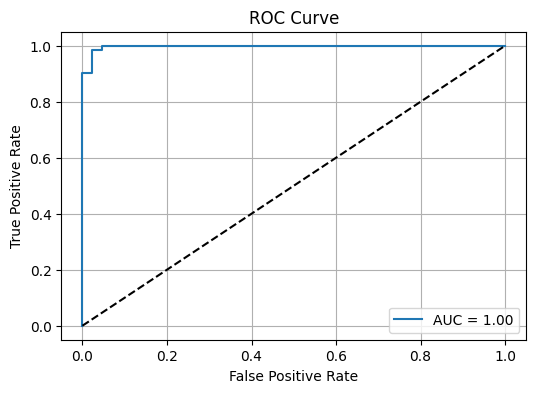

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Print confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [16]:
import numpy as np

# Custom threshold
threshold = 0.6
y_pred_custom = (y_prob >= threshold).astype(int)

print(f"\nConfusion Matrix with threshold = {threshold}:")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report with custom threshold:")
print(classification_report(y_test, y_pred_custom))

# Sigmoid explanation (optional)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print("\nExample sigmoid values:")
for z in [-5, 0, 5]:
    print(f"sigmoid({z}) = {sigmoid(z):.4f}")



Confusion Matrix with threshold = 0.6:
[[42  1]
 [ 1 70]]

Classification Report with custom threshold:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Example sigmoid values:
sigmoid(-5) = 0.0067
sigmoid(0) = 0.5000
sigmoid(5) = 0.9933
